# Week 2 Challenge

# Task 2

Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from concurrent.futures import ThreadPoolExecutor
from scipy.stats import binom
from scipy.stats import norm

In [2]:
def read_data(data):
    return pd.read_csv(data, parse_dates= ['date'], index_col= ['date'], dtype= {'browser': 'category', 'experiment': 'category'})

Loading The Data

In [8]:
df=pd.read_csv(r'C:\Users\AB\Desktop\AdSmartABdata.csv')

In [9]:
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [10]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [11]:
df.tail()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0
8076,fffbb9ff-568a-41a5-a0c3-6866592f80d8,control,2020-07-10,14,Samsung SM-G960F,6,Facebook,0,0


Data Overview

In [13]:
df.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 3.1 MB


Data Description

In [14]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


# There are three categorical variables in the above datset:
* experiment
* device_make
* browser

## Experiment has two categories - exposed and control group.

## Control Group: users who have been shown a dummy advertisement.

Exposed Group: users who have been shown a creative, an online interactive advertisement, with the SmartAd brand.

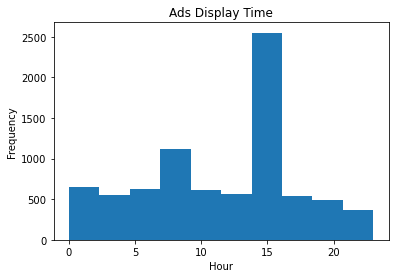

In [30]:
df['hour'].plot.hist()
plt.title('Ads Display Time')
plt.size
plt.xlabel('Hour');

From the above overview of the Hour's column, it could be noticed that most of the Ads were shown in the 15hrs of the day.

In [35]:
df['platform_os'].unique()

array([6, 5, 7], dtype=int64)

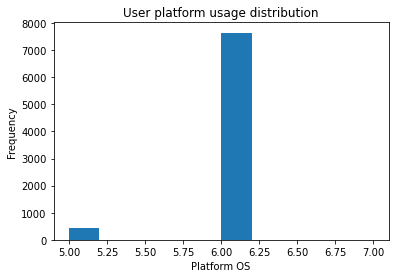

In [40]:
df['platform_os'].plot.hist()
plt.title('User platform usage distribution')
plt.xlabel('Platform OS');

Most of the users are using platform_os=6

# Exposed and control online users.

In [42]:
df.query('experiment == "exposed"').head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0


In [44]:
df.query('experiment == "control"').head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0


In [78]:
df_clean=df.drop(df[(df.yes == 0) & (df.no == 0)].index)
df_clean

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


In [79]:
df_grouped = df_clean.groupby('experiment').agg(yes=('yes', 'sum'),no=('no','sum'))

df_grouped['total']=df_grouped['yes']+df_grouped['no']
df_grouped

,yes,no,total
experiment,,,
control,264,322,586
exposed,308,349,657


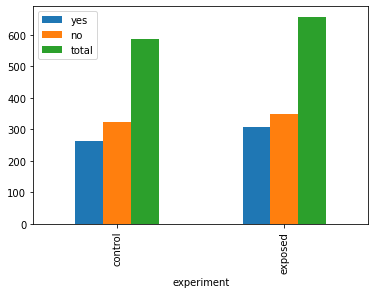

In [80]:
df_grouped.iloc[:2, :].plot.bar();

From above visual, it could be noticed that the rate of No for both the Control and exposed is much more than that of Yes

Text(0.5, 1.0, 'Top 10 device used to used to receive the BIO questionaaire')

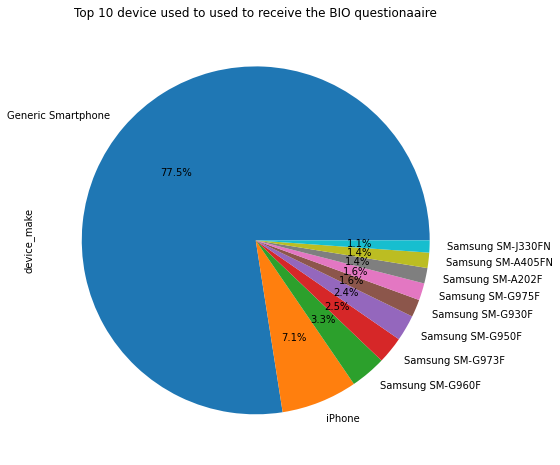

In [62]:
df['device_make'].value_counts().head(10).plot.pie(figsize= (18, 8), autopct='%1.1f%%')
plt.title("Top 10 device used to used to receive the BIO questionaaire")

# Next,The browser user used for the Bio

In [65]:
browser_exp= pivot_exp(df, index= 'browser', margin= False)
browser_exp

,no,yes
browser,,
Android,0,0
Chrome,1,1
Chrome Mobile,381,314
Chrome Mobile WebView,111,116
Chrome Mobile iOS,0,1
Edge Mobile,0,0
Facebook,87,69
Firefox Mobile,0,0
Mobile Safari,10,4


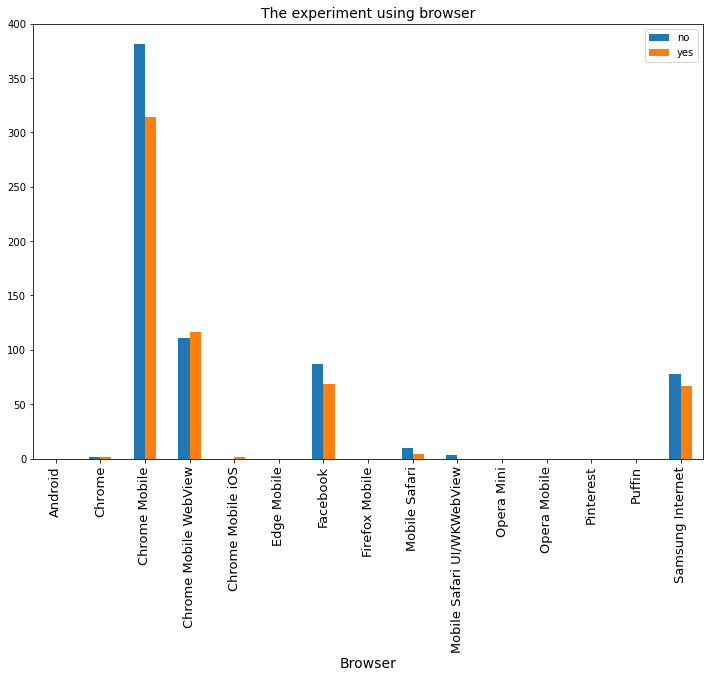

In [66]:
browser_exp.plot.bar(figsize= (12, 8)).set_title('The experiment using browser', fontsize= 14)
plt.xticks(fontsize= 13)
plt.xlabel('Browser', fontsize= 14);

C:\Users\AB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


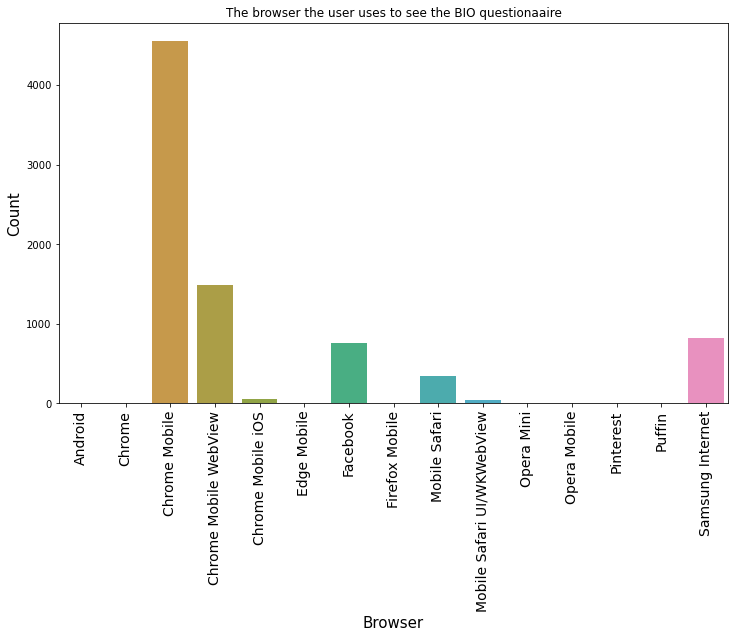

In [68]:
plt.figure(figsize= (12, 7))
sns.countplot(df['browser'].sort_values())
plt.xticks(rotation= 90, fontsize= 14)
plt.xlabel('Browser', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title('The browser the user uses to see the BIO questionaaire');

Most of the users use Chrome Mobile to see the BIO questionnaire

In [81]:
df_grouped

,yes,no,total
experiment,,,
control,264,322,586
exposed,308,349,657


# Classical A/B Testing

Assign the number of total users in the Experimental and Control groups.Also show how many of each was converted "Recogonized the brand that was advertized".

In [74]:
num_a, num_b = 586, 657
yes_a, yes_b = 264, 308
rate_a, rate_b = yes_a / num_a, yes_b / num_b

Plot how the probability of conversion lies within each population.

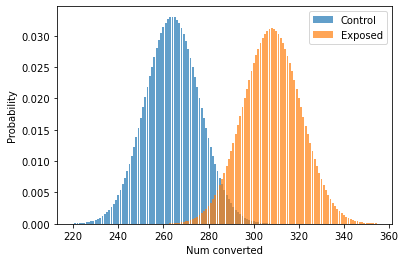

In [77]:
# Determine the probability of having x number of click throughs
clicks = np.arange(220, 355)
prob_a = binom(num_a, rate_a).pmf(clicks)
prob_b = binom(num_b, rate_b).pmf(clicks)

# Make the bar plots.
plt.bar(clicks, prob_a, label="Control", alpha=0.7)
plt.bar(clicks, prob_b, label="Exposed", alpha=0.7)
plt.legend()
plt.xlabel("Num converted"); plt.ylabel("Probability");

Now by using approximation due to large sample numbers we will generate a normal distribution.

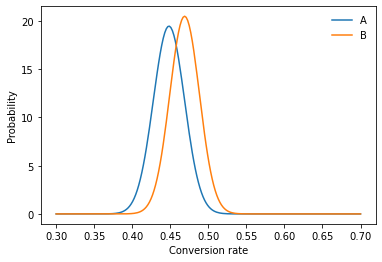

In [85]:
std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)

click_rate = np.linspace(0.3, 0.7, 200)
prob_a = norm(rate_a, std_a).pdf(click_rate)
prob_b = norm(rate_b, std_b).pdf(click_rate)

# Make the bar plots.
plt.plot(click_rate, prob_a, label="A")
plt.plot(click_rate, prob_b, label="B")
plt.legend(frameon=False)
plt.xlabel("Conversion rate"); plt.ylabel("Probability");

Finally we can compute for our p value by finding the area under our new distribution.

zscore is 0.728, with p-value 0.233


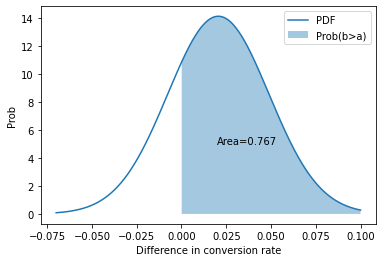

In [86]:
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))

x = np.linspace(-0.07, 0.1, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.4)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in conversion rate"); plt.ylabel("Prob");

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

Confidence is as follows.

In [87]:
norm.cdf(z_score)

0.7667262946308229

This shows that p-value is 0.233 and the confidence is 0.767.

If the p-value is less than 0.05, we reject the null hypothesis.

That there is no difference between the means and conclude that a significant difference does exist.

If the p-value is larger than 0.05, we cannot conclude that a significant difference exists.

our p value is 0.233 so that there is no significant effect on our experiment.

Not determine the truth.

that the result is due to chance — which is not true.

So,we need additional datas,but it is known that it costs many datas reduce P value.


# Sequential test

In [2]:

# SPRT 
# Binomial Endpoints
import sprt as sprt
import numpy as np

# Null value
h0 = 0.5
# Alternative value
h1 = 0.55
# Type I error rate = 0.05
alpha = 0.05
# Type II error rate = 0.2
beta = 0.2
# Values
values = np.random.binomial(1, 0.55, 100)
test = sprt.SPRTBinomial(h0 = h0, h1 = h1, alpha = alpha, beta = beta, values = values)

Decision:	Continue

     values   lower   upper
n                          
91       50  40.014  61.595
92       51  40.539  62.120
93       52  41.064  62.646
94       53  41.589  63.171
95       53  42.114  63.696
96       53  42.639  64.221
97       53  43.164  64.746
98       53  43.689  65.271
99       53  44.214  65.796
100      54  44.740  66.321


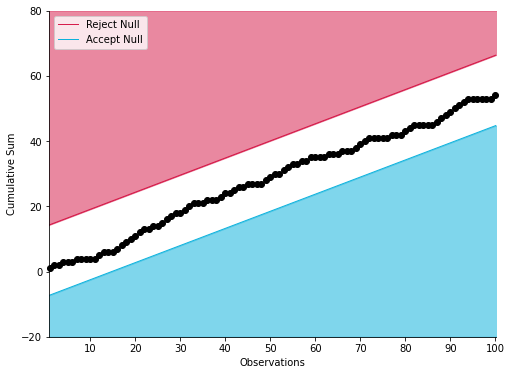

In [3]:
test.plot()

# We have to reject the null hypothesis.

# A null hypothesis is a hypothesis that says there is no statistical significance between the two variables. 